<a href="https://colab.research.google.com/github/patelruday/Sentiment_analysis_for_mentol_health_monitoring/blob/main/Sentiment_Analysis_for_Mental_Health_Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"OM NAMO BHAGVATE VASUDEVAY"

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d suchintikasarkar/sentiment-analysis-for-mental-health

Dataset URL: https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health
License(s): DbCL-1.0
sentiment-analysis-for-mental-health.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sentiment-analysis-for-mental-health.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
BASE_DIR = '/content/drive/MyDrive/mental_health/base_dir'
WORKING_DIR='/content/drive/MyDrive/mental_health/work_dir'


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Combined Data.csv',index_col=0)
df.head()

statement   status
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3  I've shifted my focus to something else but I'...  Anxiety
4  I'm restless and restless, it's been a month n...  Anxiety

In [ ]:
df.shape

(53043, 2)

In [ ]:
df.groupby('status').describe()

statement         \
                         count unique   
status                                  
Anxiety                   3841   3623   
Bipolar                   2777   2501   
Depression               15404  15094   
Normal                   16343  16040   
Personality disorder      1077    895   
Stress                    2587   2296   
Suicidal                 10652  10644   

                                                                              
                                                                    top freq  
status                                                                        
Anxiety               "No regrets or grudges/angry at things that ha...    5  
Bipolar               How do you manage feeling down about the futur...    2  
Depression                                                       #NAME?    8  
Normal                                                what do you mean?   22  
Personality disorder  how to get over fear of therapy/getting help i...    4  
Stress                Survey on Situational Stress and Music (18 and...   10  
Suicidal              RT @palestinianho: patient: i hate myself and ...    2

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='status', ylabel='count'>

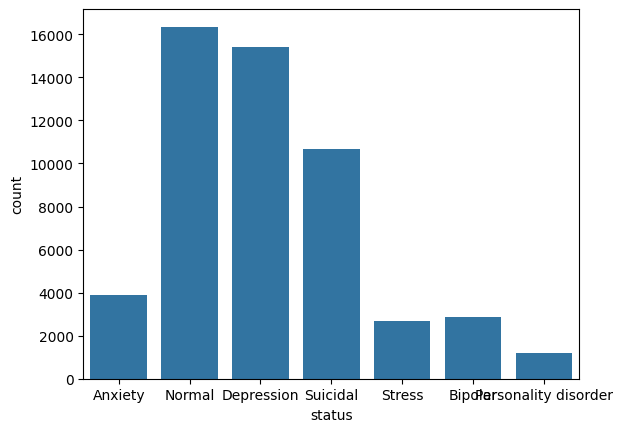

In [ ]:
sns.countplot(x='status',data=df)

In [ ]:
df.isnull().sum()

statement    362
status         0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

statement    0
status       0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
l_encoder = LabelEncoder()
l_encoder.fit(df['status'])

LabelEncoder()

In [ ]:
l_encoder.classes_

array(['Anxiety', 'Bipolar', 'Depression', 'Normal',
       'Personality disorder', 'Stress', 'Suicidal'], dtype=object)

In [ ]:
l_encoder.transform(df['status'])

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df['status'] = l_encoder.transform(df['status'])

In [ ]:
df.sample(5)

statement  status
21     Successfully online at 9am. Even sleeping in a...       0
10665  30 days from now I will be 16. It feels surrea...       6
33337                                 i like that shirt.       3
10166  Hi all,I write this just because I need to let...       2
36901     Ecstatic that Wal-Mart now carries Sambazon!!!       3

In [ ]:
df.duplicated().sum()

1588

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(51093, 2)

In [ ]:
df.describe()

status
count  51093.000000
mean       3.126319
std        1.784858
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000

In [ ]:
#calculate max lenth of statement
df['statement_length']=df['statement'].apply(lambda x:len(x))
df['statement_length'].describe()

count    51093.000000
mean       575.600141
std        847.947705
min          2.000000
25%         79.000000
50%        313.000000
75%        745.000000
max      32759.000000
Name: statement_length, dtype: float64

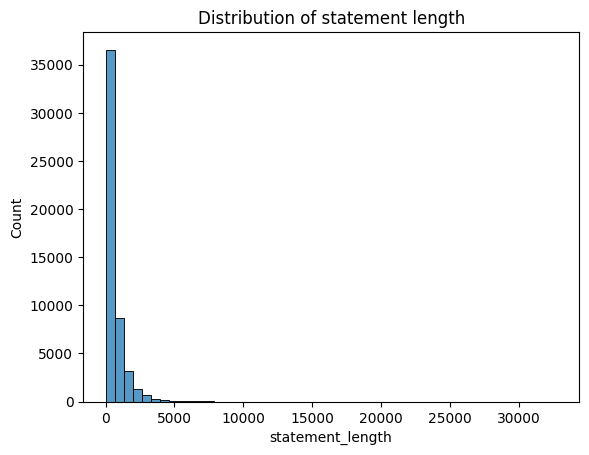

In [ ]:
sns.histplot(df['statement_length'],bins=50)
plt.title('Distribution of statement length')
plt.show()



we can see that 75% of statements have length 745, and max length is 32759 ,so clearly there are outlires,we remove outliers using IQR method

In [ ]:
#calculate 25th(q1) and 75th percectile(q3)
q1=df['statement_length'].quantile(0.25)
q3=df['statement_length'].quantile(0.75)
#calculate iqr
iqr=q3-q1

In [ ]:
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

In [ ]:
df_filtered=df[(df['statement_length']<=upper_bound) & (df['statement_length']>=lower_bound)]

In [ ]:
df_filtered.shape

(47647, 3)

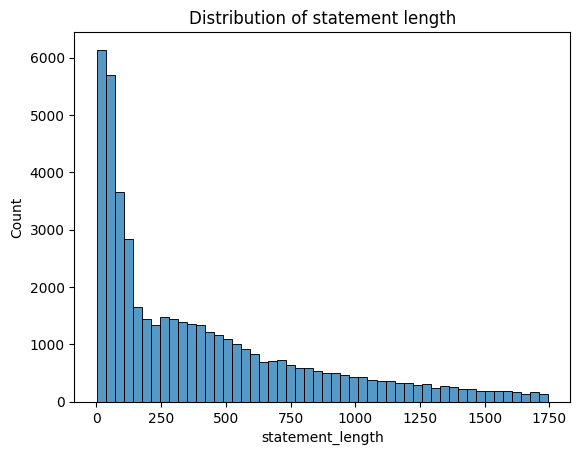

In [ ]:
#plot length of statements without outliers
sns.histplot(df_filtered['statement_length'],bins=50)
plt.title('Distribution of statement length')
plt.show()

plot wordcloud plot for each class

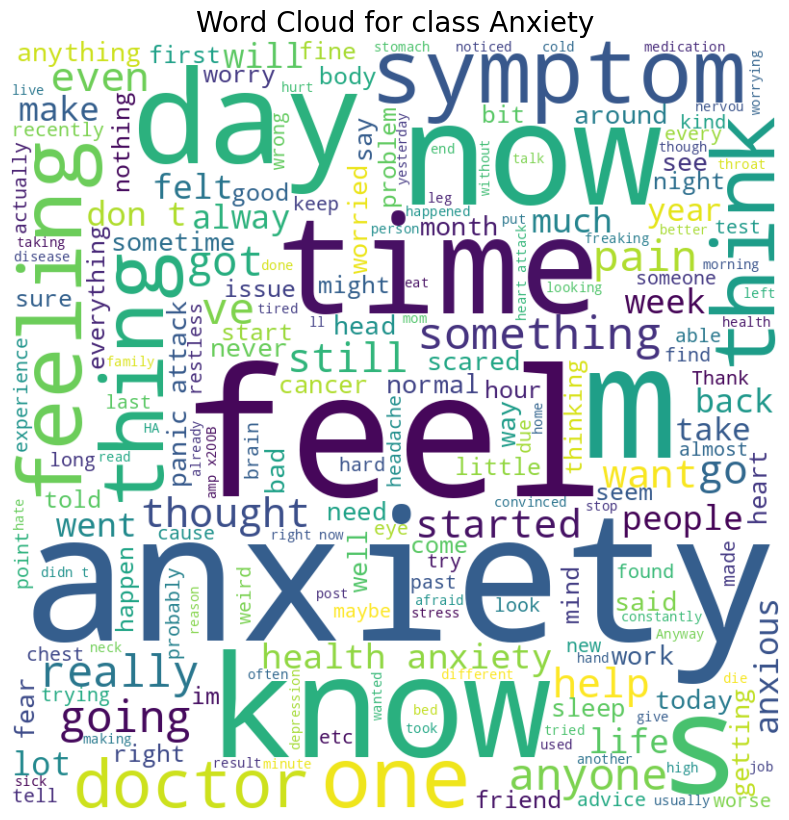

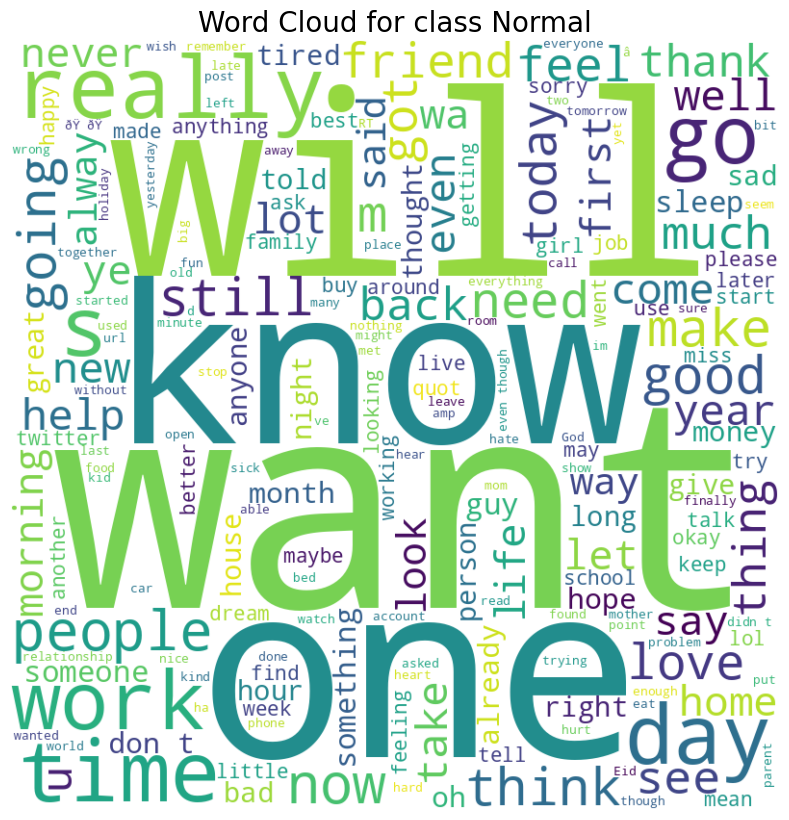

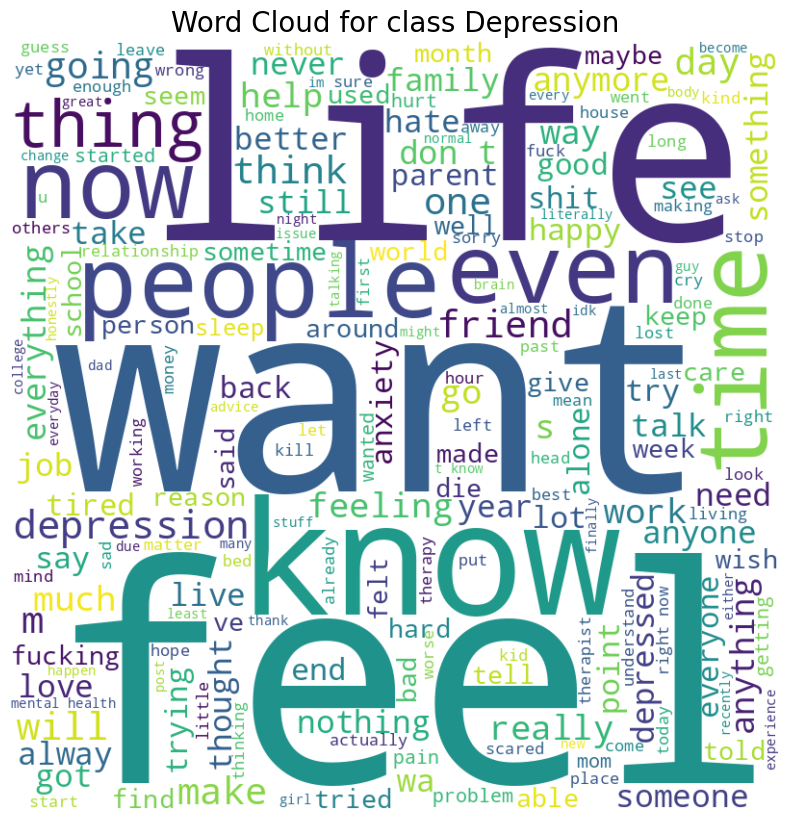

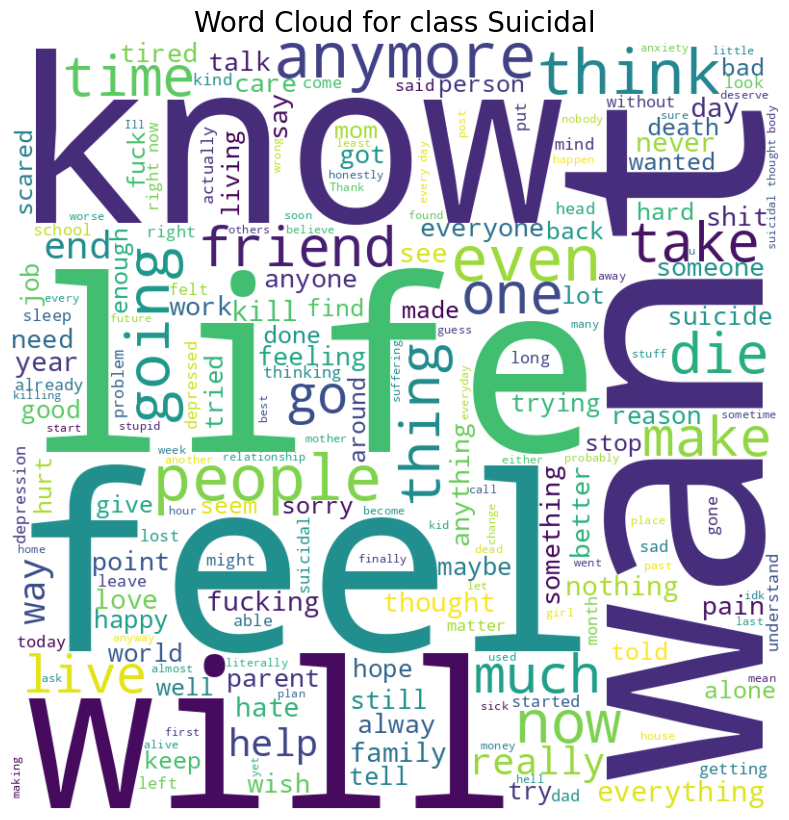

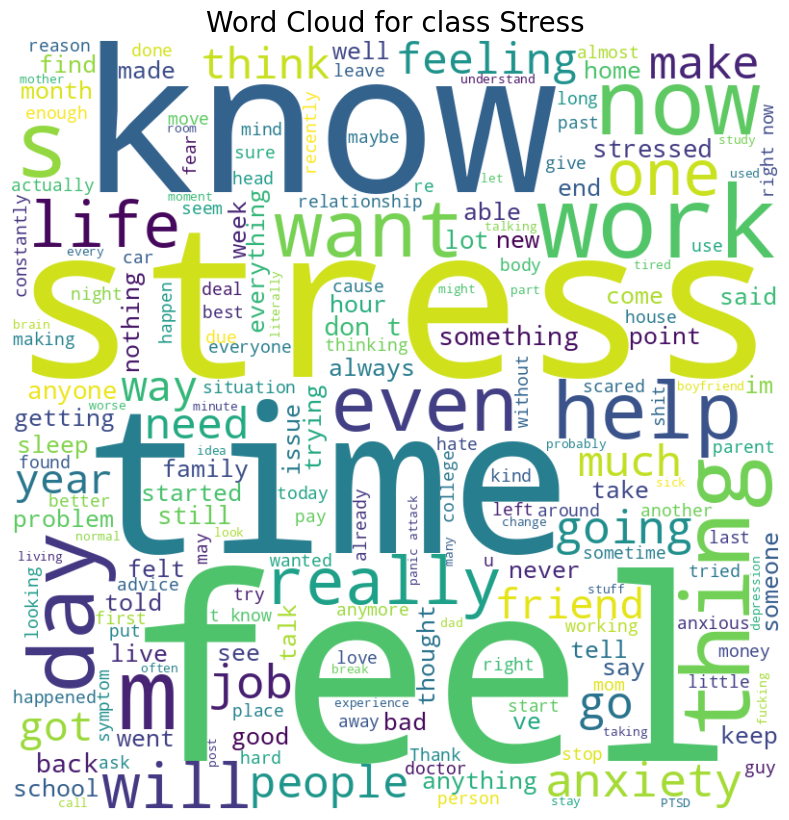

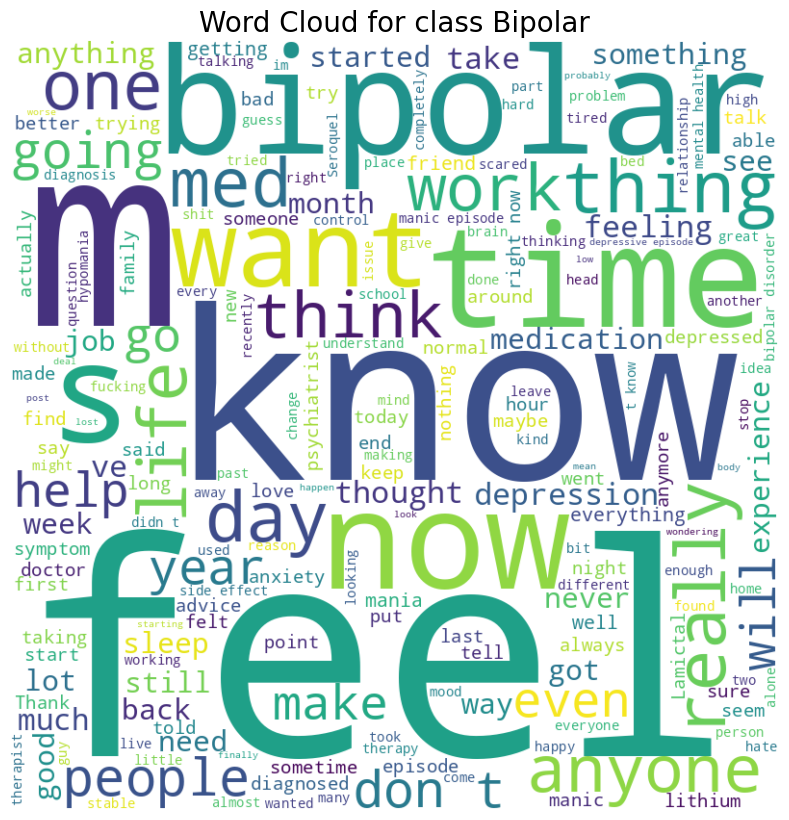

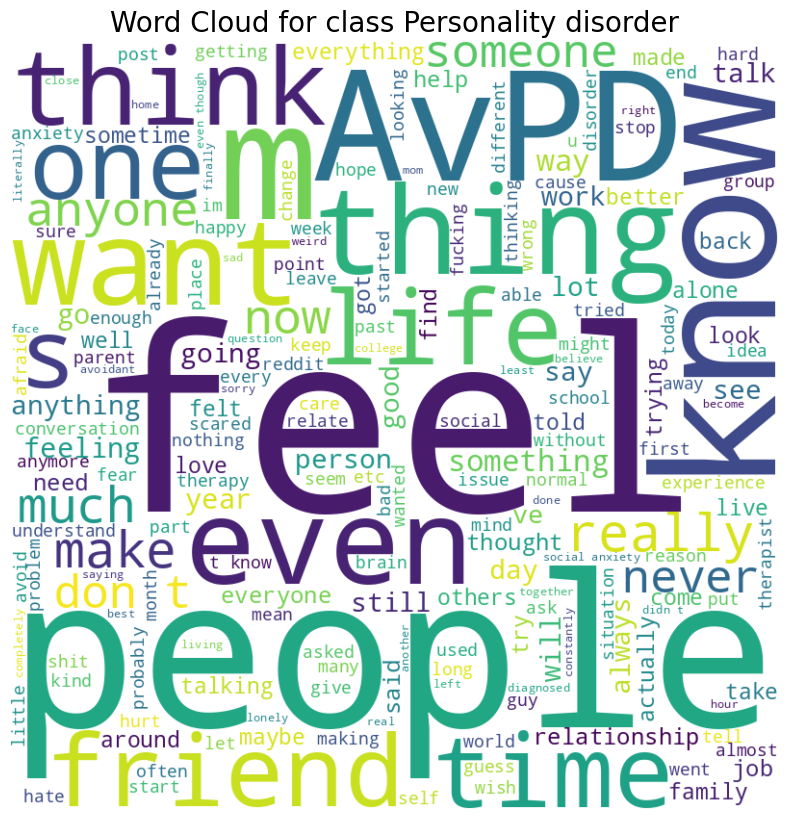

In [ ]:
from wordcloud import WordCloud
def generate_word_cloud(text,title):
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title(title,fontsize=20)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
# generate wordcloud for each class
labels=df['status'].unique()
for label in labels:
    text=df[df['status']==label]['statement'].str.cat(sep=' ')
    generate_word_cloud(text,title=f'Word Cloud for class {l_encoder.classes_[label]}')

Text preprocessing

In [ ]:
df_filtered.shape

(47647, 3)

In [ ]:
df_filtered['statement'][1003]

"Why does the money have to be limited, if it's not limited there won't be a sick cat like this"

In [ ]:
df_filtered['status'].value_counts()

status
3    16040
2    13445
6     9669
0     3297
5     2218
1     2188
4      790
Name: count, dtype: int64

In [ ]:
df_filtered.shape

(47647, 3)

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_filtered['statement'],df_filtered['status'],test_size=0.2,random_state=42,stratify=df_filtered['status'])


In [ ]:
x_train.shape

(38117,)

In [ ]:
x_test.shape

(9530,)

In [ ]:
from transformers import BertTokenizer,TFBertForSequenceClassification

#Tokenize and encode the data using the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# take 10% samples from trainnin for validation data
X_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=42,stratify=y_train)

In [ ]:
X_train.shape

(34305,)

In [ ]:
x_val.shape

(3812,)

In [ ]:
max_len= 128
# Tokenize and encode the sentences
x_train_encoded = tokenizer.batch_encode_plus(X_train.tolist(),
											padding=True,
											truncation=True,
											max_length = max_len,
											return_tensors='tf')

x_val_encoded = tokenizer.batch_encode_plus(x_val.tolist(),
											padding=True,
											truncation=True,
											max_length = max_len,
											return_tensors='tf')

x_test_encoded = tokenizer.batch_encode_plus(x_test.tolist(),
											padding=True,
											truncation=True,
											max_length = max_len,
											return_tensors='tf')

In [ ]:
k = 0
print('Training Comments -->>',X_train[k])
print('\nInput Ids -->>\n',x_train_encoded['input_ids'][k])
print('\nDecoded Ids -->>\n',tokenizer.decode(x_train_encoded['input_ids'][k]))
print('\nAttention Mask -->>\n',x_train_encoded['attention_mask'][k])
print('\nLabels -->>',y_train[k])


Training Comments -->> oh my gosh

Input Ids -->>
 tf.Tensor(
[  101  2823  2009  3632  2046  2019  5025  6634  2886  1010  2021  2025
  2205  2411  1012  2026  3129  2038  3728  7917  2033  2013  2183  5973
  2894  4983  7078  4072  1006  2066  2000  2147  1007  1012  2003  2023
  2242  1037  2326  3899  2052  2022 14044  2005  1029  2030  2515  2009
  2031  2000  2022  1037  2843  4788  2084  2008  1029  3374  2065  2009
  1005  1055  1037  6881  3160  1010  2009  1005  1055  2074  2242  1045
  1005  2310  2042  3241  2055  1012   102     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0], shape=(128,), dtype=int32)

Decoded Ids -->>
 [CLS] sometimes it goes into an actual panic attack, but not too often. my husband has recently banned me from 

In [ ]:
# Intialize the model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=7)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  5383      
                                                                 
Total params: 109487623 (417.66 MB)
Trainable params: 109487623 (417.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf

In [ ]:
# Compile the model with an appropriate optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


Train the model

In [ ]:
# Step 5: Train the model
history = model.fit(
	[x_train_encoded['input_ids'], x_train_encoded['token_type_ids'], x_train_encoded['attention_mask']],
	y_train,
	validation_data=(
	[x_val_encoded['input_ids'], x_val_encoded['token_type_ids'], x_val_encoded['attention_mask']],y_val),
	batch_size=32,
	epochs=5
)

Epoch 1/5
1073/1073 [==============================] - 879s 819ms/step - loss: 0.2882 - accuracy: 0.8843 - val_loss: 0.4986 - val_accuracy: 0.8229
Epoch 2/5
1073/1073 [==============================] - 879s 819ms/step - loss: 0.2082 - accuracy: 0.9184 - val_loss: 0.4841 - val_accuracy: 0.8242
Epoch 3/5
1073/1073 [==============================] - 879s 819ms/step - loss: 0.1360 - accuracy: 0.9504 - val_loss: 0.5478 - val_accuracy: 0.8245
Epoch 4/5
 433/1073 [===========>..................] - ETA: 8:19 - loss: 0.0770 - accuracy: 0.9749

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
y_pred=model.predict([x_test_encoded['input_ids'], x_test_encoded['token_type_ids'], x_test_encoded['attention_mask']])

298/298 [==============================] - 82s 266ms/step


In [ ]:
import numpy as np
y_pred_1=np.argmax(y_pred[0],axis=1)

In [ ]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       659
           1       0.81      0.83      0.82       438
           2       0.75      0.78      0.76      2689
           3       0.98      0.92      0.95      3208
           4       0.72      0.61      0.66       158
           5       0.66      0.75      0.70       444
           6       0.72      0.73      0.72      1934

    accuracy                           0.82      9530
   macro avg       0.79      0.78      0.78      9530
weighted avg       0.82      0.82      0.82      9530

